# Light curve features (II)

**Advanced Astroinformatics Student Project**

*N. Hernitschek, 2022*



---
## Contents
* [Recap, Questions](#first-bullet)
* [Continue with feature extraction](#second-bullet)
* [Plotting features](#third-bullet)
* [Summary](#fifth-bullet)


## 1. Recap, Questions <a class="anchor" id="first-bullet"></a>

Time for questions!

Your **tasks until this week** were:

Try running the Fourier transformation, Lomb-Scargle Periodogram, and the feature extraction from the `feets` package on all stars from the TESS sample and report any issues you encounter.

hints:
* it will be faster if you run the code not in the Jupyter notebook, but write a Python code file and execute it from the command line
* think about which data should be written to your output table.

## 1. Continue with feature extraction <a class="anchor" id="second-bullet"></a>


### compare calculated features


The `feets` package provides the period features `PeriodLS` and `Period_fit`.
By using the documentation (website and paper), and your results, compare them.

Were period features calculated which seem to be unrealistic? How do you decide whether they are unrealistic?
Hint: type of star, length of light curve


### replace features calculated by `feets`


For the `feets` package, there is a bug reported regarding three features: `AndersonDarling`,`StetsonK`,`StetsonK_AC`.

To replace those features, look them up online. They are available in other common packages, and/or you can write the equations on your own.

Then rerun the feature calculation code with the following parameters:


In [1]:

# exclude features "AndersonDarling","StetsonK","StetsonK_AC" as they are unreliable
fs = feets.FeatureSpace(data = ['time', 'magnitude', 'error'], exclude=["AndersonDarling","StetsonK","StetsonK_AC"])



NameError: name 'feets' is not defined

and calculate the `AndersonDarling`,`StetsonK`,`StetsonK_AC` using other methods. Again, write a feature output table.
                            

## 2. Plotting features <a class="anchor" id="third-bullet"></a>


To compare which part of the **feature space** is occupied by different types of stars, we can use a **corner plot**. You have already installed the `corner` library in week 2.

Before running `corner` on your feature table (this will take a while), let's first plot some mock data to set up the plot.

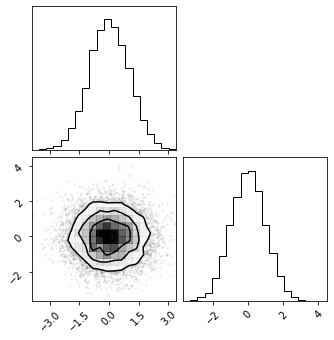

In [2]:
# a very basic corner plot

import corner
import numpy as np

# create mock data
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)


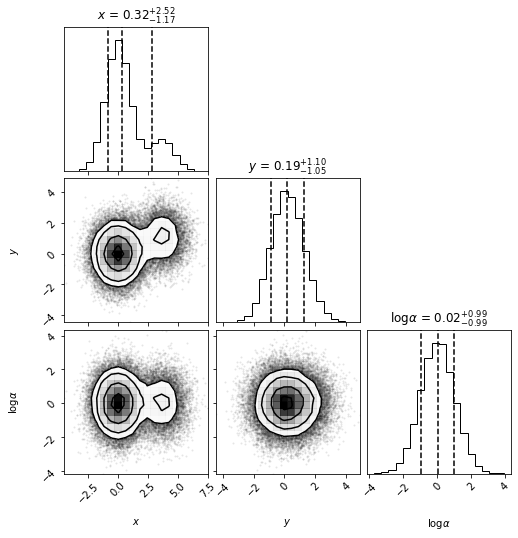

In [3]:

#that's how a corner plot for e.g. your report, or a publication should look like

# create mock data
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

# the operator // is the Floor division (dividing and rounding down to the nearest integer.)

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

We now want to create two data sets and plot them in the same corner plot.

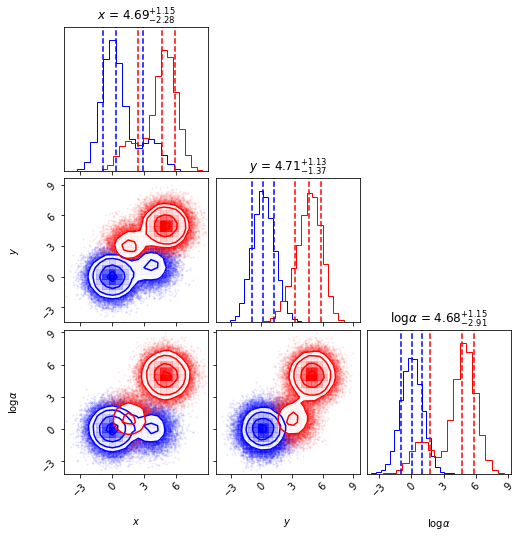

In [8]:
 

# create mock data
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim]) 
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))


data3 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])+ 5.0
data4 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))


data_1 = np.vstack([data1, data2])
data_2 = np.vstack([data3, data4])


# Plot it.
figure = corner.corner(data_1, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, color='blue')

figure = corner.corner(data_2, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, color='red', fig=figure)


**Your tasks until next week:**

Create a feature table showing the calculated features for all variable stars in the TESS sample (using the _TESS_lightcurves_outliercleaned light curves).

Use this feature table to create a triangle plot showing the features first for all variable stars from one star type (e.g.: ACV). If this works, for each type create a triangle plot.
Then, calculate the feature table also for the other versions of the light curves (_TESS_lightcurves_median_after_detrended, _TESS_lightcurves_raw). Overplot these features to each of your triangle plots. (I.e.: After this step you should have individual triangle plots for the types ACV, CEP, DCEP..., showing the calculated features for te raw, median/detrended, and outlier cleaned light curves.)

What do these triangle plots tell you?


## Summary <a class="anchor" id="fifth-bullet"></a>

At this point, all of you should have:
* an understanding of time series in astronomy
* seen some algorithms for extracting information from time series
* applied this to TESS light-curve data.